# Julia: a fresh approach to technical computing


* Julia is a high-level programming language for technical computing which allows you to manipulate and analyse large data sets
* Other programming languages similar to Julia are Matlab and Python
* Unlike Python, Julia is build from the ground for techical computing
* Unlike Matlab, julia is free and open-source software
* Julia is fast (http://julialang.org/benchmarks/, and also benchmarks below)


## Try Julia

* Try julia online at https://juliabox.com/

## Install Julia

* Go to http://julialang.org/downloads/
* Install also a text editor with julia support (e.g. emacs with the julia mode)

### Optionally

* Install Jupyter http://jupyter.org/

# Variable declarations 

## Unicode

* Unicode in in variables names and function
* For example greek letters
* Typed as, e.g. \alpha followed by Tab in text editor with Julia support)

In [1]:
α = π/2

1.5707963267948966

* Also for function names

In [2]:
function my_serious_function😼(x,y)
    return y,x
end

my_serious_function😼 (generic function with 1 method)

In [3]:
my_serious_function😼(1,2)

(2,1)

* also for build-in operators

In [4]:
2 ∈ Set([2,3])

true

In [5]:
2 in Set([2,3])

true

* Do not get crazy

In [6]:
𝔳𝔞𝔯𝔦𝔞𝔟𝔩𝔢 = 1.234
שคгเค๒ɭє = 2.345

2.345

# Functions

* Functions are central in julia:
  * functions are "first-class" (e.g. a variable/parameter can hold a function)
  * all operators are defined as functions: `1+2` is in fact `+(1,2)`
  * functions are very flexible due to [multiple dispatch](https://en.wikipedia.org/wiki/Multiple_dispatch)
* There are 3 ways to define a function:

In [7]:
function times_two(x)
    return 2x
end

times_two (generic function with 1 method)

* `return` is actually optional. If it is not present, then the last value of a function is returned.

In [8]:
times2(x) = 2x

times2 (generic function with 1 method)

In [9]:
x -> 2x

(::#1) (generic function with 1 method)

# Arrays

* Arrays can be homogenous or heterogenous
* Julia figures this out for you

* Homogenous arrays:

In [10]:
arr = [1,2,3,4]

4-element Array{Int64,1}:
 1
 2
 3
 4

Elements can also be converted if necessary to make an homogenous array

In [11]:
arr2 = [2.,4.,5]

3-element Array{Float64,1}:
 2.0
 4.0
 5.0

Example of an heterogeneous array

In [12]:
arr = [1,2,"this is a string"]

3-element Array{Any,1}:
 1                  
 2                  
  "this is a string"

## Automatic type inference

In [13]:
function speed(u,v)
    u2 = u.^2
    v2 = v.^2
    s2 = u2 + v2
    s = √(s2)
    return s
end

speed (generic function with 1 method)

In [14]:
@code_warntype speed(1.,2.)

Variables:
  #self#::#speed
  u::Float64
  v::Float64
  u2::Float64
  v2::Float64
  s2::Float64
  s::Float64

Body:
  begin 
      u2::Float64 = (Base.box)(Base.Float64,(Base.mul_float)(u::Float64,u::Float64)) # line 3:
      v2::Float64 = (Base.box)(Base.Float64,(Base.mul_float)(v::Float64,v::Float64)) # line 4:
      s2::Float64 = (Base.box)(Base.Float64,(Base.add_float)(u2::Float64,v2::Float64)) # line 5:
      s::Float64 = (Base.Math.box)(Base.Math.Float64,(Base.Math.sqrt_llvm)(s2::Float64))::Float64 # line 6:
      return s::Float64
  end::Float64


In [15]:
speed([1.,2.],[2.,3.])

2-element Array{Float64,1}:
 2.23607
 3.60555

In [16]:
@code_warntype speed([1.,2.],[2.,3.])

Variables:
  #self#::#speed
  u::Array{Float64,1}
  v::Array{Float64,1}
  u2::Array{Float64,1}
  v2::Array{Float64,1}
  s2::Array{Float64,1}
  s::Array{Float64,1}

Body:
  begin 
      u2::Array{Float64,1} = $(Expr(:invoke, LambdaInfo for .^(::Array{Float64,1}, ::Int64), :(Main..^), :(u), 2)) # line 3:
      v2::Array{Float64,1} = $(Expr(:invoke, LambdaInfo for .^(::Array{Float64,1}, ::Int64), :(Main..^), :(v), 2)) # line 4:
      s2::Array{Float64,1} = $(Expr(:invoke, LambdaInfo for _elementwise(::Base.#+, ::Type{Float64}, ::Array{Float64,1}, ::Array{Float64,1}), :(Base._elementwise), :(Base.+), :($(QuoteNode(Float64))), :(u2), :(v2))) # line 5:
      s::Array{Float64,1} = $(Expr(:invoke, LambdaInfo for collect(::Base.Generator{Array{Float64,1},Base.#sqrt}), :(Base.collect), :($(Expr(:new, Base.Generator{Array{Float64,1},Base.#sqrt}, :(Base.Math.sqrt), :(s2)))))) # line 6:
      return s::Array{Float64,1}
  end::Array{Float64,1}


# Code generation

* The julia compiler generates efficient machine code
* Loops are not slow (compared to Python, Matlab or Octave)
* It is still possible to use vectorized code
  * vectorized code typically uses more memory than code with explicit loops
  * vectorized code is slightly slower than code with with explicit loops
 

In [17]:
@code_llvm speed(1.,2.)


define double @julia_speed_71446(double, double) #0 {
pass:
  %2 = fmul double %0, %0
  %3 = fmul double %1, %1
  %4 = fadd double %2, %3
  %5 = call double @llvm.sqrt.f64(double %4)
  ret double %5
}


In [18]:
@code_native speed(1.,2.)

	.text
Filename: In[13]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 2
	mulsd	%xmm0, %xmm0
Source line: 3
	mulsd	%xmm1, %xmm1
Source line: 4
	addsd	%xmm0, %xmm1
Source line: 5
	xorps	%xmm0, %xmm0
	sqrtsd	%xmm1, %xmm0
Source line: 6
	popq	%rbp
	retq
	nopl	(%rax)


## Benchmarks


### Mandelbrod fractals

* Median times of 30 runs

|                  |      style | run time (sec)  |
|------------------|------------|----------------:|
| matlab R2013a    |       loops|   5.67     |
| matlab R2013a    |  vectorized|   2.40  |
|  octave 3.8.1    |       loops| 184.56  |
|  octave 3.8.1    |  vectorized|   4.72  |
|     julia 0.5    |       loops|   0.19 |
|     julia 0.5    |  vectorized|   2.24  |

### Ensemble Transform Kalman Filter (ETKF)

#### Parameters

| parameter                               | value  |
|-----------------------------------------|--------|
| number of elements in the state vector  | 50     |
| ensemble size                           | 100    |
| number of observations                  | 5      |
| number of water columns                 | 10000  |

#### Run-time

| Language | version | comments | run-time (s) |
|----------|---------|----------|--------------|
| Julia    | 0.4.5   |          | 43.362 |
| Fortran (gfortran)  | 4.8.4   | intrinsic matmul             |  136.481 |
| Fortran (gfortran) | 4.8.4   | matmul calls external BLAS    |  32.483  |
| Matlab   | R2013a  |          | 31.1854      |
| Octave   | 3.8.1   |          | 58.019       |




| Language | version | comments | run-time (s) |
|----------|---------|----------|--------------|
| Fortran (gfortran) | 4.8.4   | matmul calls external BLAS    |  32.483  |
| Julia    | 0.5.0   | type-stable, without bounds check         | 29.948924 |


# Working with files
* open a file, and load every line sequentially

In [19]:
f = open("file.txt")
for l in eachline(f)
         println(l)
end
close(f)


this

is

a test



* a common error is to forget to close the file
* with a do-block

In [20]:
open("file.txt") do f
  for l in eachline(f)
     println(l)
  end
end

this

is

a test



* similar to python's `with` statement

# Visualization

* Julia can call all Python modules, for instance also matplotlib
* `PyPlot` is a matplotlib wrapper

In [21]:
using PyPlot

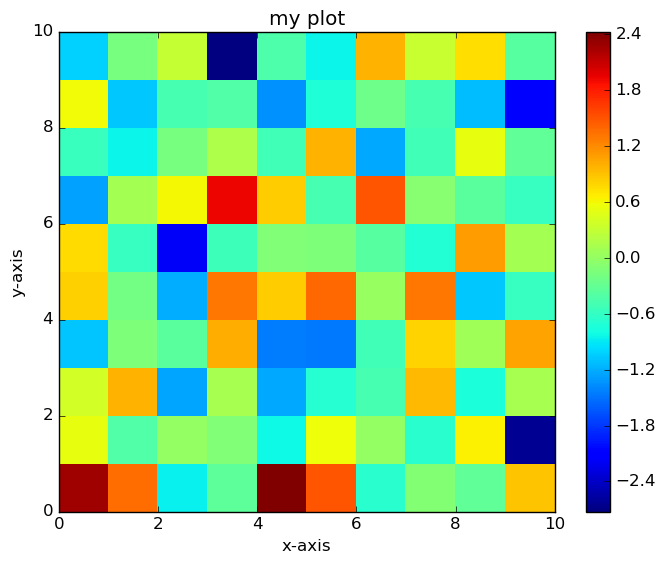

PyObject <matplotlib.colorbar.Colorbar object at 0x7f30b47b5450>

  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/abarth/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /home/abarth/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/abarth/.julia/v0.5/PyCall/src/PyCall.jl
  li

In [22]:
x = randn(10,10)
pcolor(x)
xlabel("x-axis")
ylabel("y-axis")
title("my plot")
colorbar()

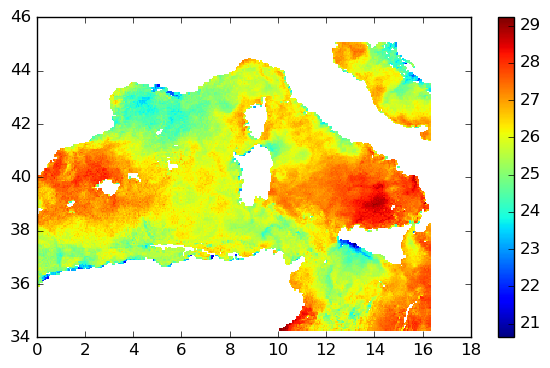

In [23]:
using NetCDF
using PyCall
figure(figsize=(7,4))
@pyimport numpy.ma as ma
fname = "/home/abarth/Lectures/MatlabOctaveTutorial/data/WesternMedSST.nc"
lon = ncread(fname,"lon"); lat = ncread(fname,"lat");
SST = ncread(fname,"seviri_sst");
fillval = ncgetatt(fname,"seviri_sst","_FillValue")
pyma(X) = pycall(ma.array, Any, X, mask=X .== fillval)
pcolor(lon,lat,pyma(SST[:,:,1]')); colorbar()

# Custom types

In [24]:
using PyPlot
using Base

* Create a new type `ParamCovar` which represents an error covariance matrix
* It behaves like an Array of 2 dimensions

In [25]:
type ParamCovar{T} <: AbstractArray{T, 2}
    n:: Int64       # dimension
    len:: T         # correlation length
    var:: T         # variance
    x:: Array{T,2}  # x[i,:] are the n coordinates of the i-th grid point
end

function Base.size{T}(PC::ParamCovar{T})
    return (PC.n,PC.n)
end

function Base.getindex{T}(PC::ParamCovar{T},i,j)
    d2 = sum((PC.x[i,:] - PC.x[j,:]).^2)
    return PC.var * exp(-d2 / (PC.len^2))
end

* Define a domain [-10,10] x [-10,10]

In [26]:
imax = 50
jmax = imax

vx1 = linspace(-10,10,imax)
vx2 = linspace(-10,10,jmax)

x1 = [x1 for x1 in vx1, x2 in vx2];
x2 = [x2 for x1 in vx1, x2 in vx2];

* create an instance of the `ParamCovar` type

In [27]:
n = length(x1)
m = 3

# n: number of grid points (total)
# len = 4 (correlation length)
# var = 1 (background variance)

# Pf = ParamCovar{Float64}(n,4.,1.,[x1[:] x2[:]]) or just
Pf = ParamCovar(n,4.,1.,[x1[:] x2[:]]);

* setup additional matrices (observation operator $\mathbf H$, observation error covariance matrix $\mathbf R$, forecast $\mathbf x_f$)

In [28]:
# index of the middle of the domain
ind = sub2ind(size(x1),Int64(imax/2),Int64(jmax/2))

H = sparse([1,2,3],
           [1,ind,n], [1.,1.,1.], 3,n)

R = Diagonal([1,1,1])
yo = [1,-1,1]


xf = zeros(n);

* optimal interpolation

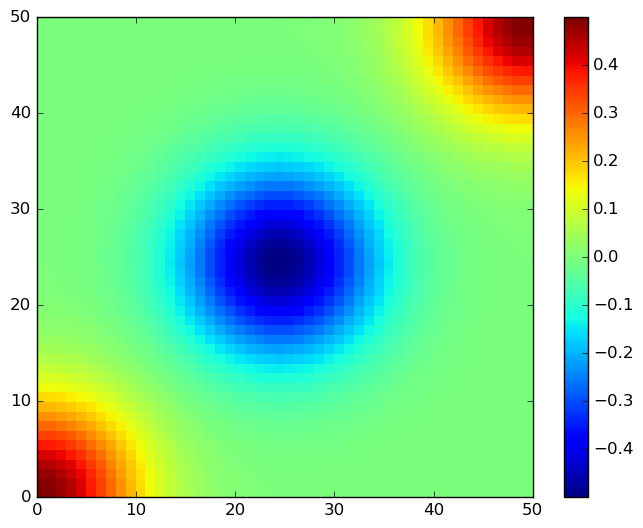

PyObject <matplotlib.colorbar.Colorbar object at 0x7f30a873b090>

In [29]:
xa = xf + Pf * (H' * ((H*Pf*H' + R) \ (yo - H*xf)))

xa = reshape(xa,size(x1))
pcolor(xa)
colorbar()


# Parallel programming

* start julia with
  * `-p`: local machine
  * `--machinefile`:  cluster
* or use, e.g. `addprocs(4)` to use 4 workers


## Lower-level constructs

In [30]:
addprocs(4)

# process ID
@show myid()

# number of all process
@show nprocs()

# id of all workers
@show workers()

# run myid() on process 4
@show fetch(@spawnat 4 myid())

myid() = 1
nprocs() = 5
workers() = [2,3,4,5]
fetch(@spawnat(4,myid())) = 4


In [31]:
@everywhere heavy_computation(x) =  x.^5;
r = @spawn heavy_computation(2)
fetch(r)

r = @spawnat 2 heavy_computation(2)
fetch(r)

32

## Distributed arrays

In [32]:
@everywhere using DistributedArrays

y = distribute([1:10;])


# get data from worker 2-5
@show fetch(@spawnat 2 localpart(y))


function some_complex_work(y::DArray)
    return DArray(size(y),procs(y)) do I
        @show I[1]        
        return localpart(y).^2
    end
end

res = some_complex_work(y)
@show res

fetch(@spawnat(2,localpart(y))) = [1,2,3]
	From worker 2:	I[1] = 1:3
	From worker 5:	I[1] = 8:10
	From worker 3:	I[1] = 4:5
	From worker 4:	I[1] = 6:7
res = [1,4,9,16,25,36,49,64,81,100]


10-element DistributedArrays.DArray{Int64,1,Array{Int64,1}}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

* work with two distributed arrays

In [33]:
function some_complex_work2(y::DArray, z::DArray)
    return DArray(size(y),procs(y)) do I
        @show I
        localpart(y).^2 + localpart(z).^2
    end
end

z = distribute(2*[1:10;])

res = some_complex_work2(y,z)
@show res

	From worker 3:	I = (4:5,)
	From worker 4:	I = (6:7,)
	From worker 5:	I = (8:10,)
	From worker 2:	I = (1:3,)
res = [5,20,45,80,125,180,245,320,405,500]


10-element DistributedArrays.DArray{Int64,1,Array{Int64,1}}:
   5
  20
  45
  80
 125
 180
 245
 320
 405
 500

# Use Julia with SLURM (e.g. nic4,...)

* It is necessary to create a "machine file"

```bash
#!/bin/bash
#SBATCH --job-name=julia
#SBATCH --mail-user=a.barth@ulg.ac.be
#SBATCH --mail-type=ALL
#SBATCH --output=output-%N-%j.out
#SBATCH --time=24:00:00
#SBATCH --ntasks=4
#SBATCH --cpus-per-task=1
#SBATCH --mem-per-cpu=300


# create a file with all machines (deleted on exit)
MACHINEFILE=$(mktemp --suffix .machinefile)
trap "rm -f $MACHINEFILE" EXIT

srun -l /bin/hostname | sort -n | awk '{print $2}' > $MACHINEFILE

bt0=$(date +%s)

julia --machinefile $MACHINEFILE <<EOF
@show nprocs()
@everywhere @show myid()
EOF

bt1=$(date +%s)

awk  " BEGIN { print \"Run time (hours): \",($bt1 - $bt0)/3600 } "
```


## Other nice features of Julia

* good document of the Julia language: http://docs.julialang.org/en/stable/
* find documentation from the julia REPL

In [34]:
?copy

search: copy copy! copysign deepcopy unsafe_copy! copper cospi complex Complex



```
copy(x)
```

Create a shallow copy of `x`: the outer structure is copied, but not all internal values. For example, copying an array produces a new array with identically-same elements as the original.


* integrated package manager

```julia
Pkg.add("DataAssim")
```

* Easy to write documentation in markdown
* Support for jupyter
* Easy to use with github, travis-ci, codecov.io
* Support of macros (function that can transform your code)
* Numerous constructs to avoid copying data
  * pass argument by reference instead of by value
  * `reshape` gives a different view on the data
  * `SubArray` ` 


In [35]:
A = [1 2 3; 4 5 6];
@show A
b = view(A,:,1)
@show b
b[1] = 100
@show A

A = [1 2 3; 4 5 6]
b = [1,4]
A = [100 2 3; 4 5 6]


2×3 Array{Int64,2}:
 100  2  3
   4  5  6

* list comprehension

In [36]:
A = [sin(π * x) for x = 0:0.2:1]

6-element Array{Float64,1}:
 0.0        
 0.587785   
 0.951057   
 0.951057   
 0.587785   
 1.22465e-16

In [37]:
A = [sin(π * x) * sin(π * y) for x = 0:0.2:1, y = 0:0.2:1]

6×6 Array{Float64,2}:
 0.0  0.0          0.0          0.0          0.0          0.0        
 0.0  0.345492     0.559017     0.559017     0.345492     7.19829e-17
 0.0  0.559017     0.904508     0.904508     0.559017     1.16471e-16
 0.0  0.559017     0.904508     0.904508     0.559017     1.16471e-16
 0.0  0.345492     0.559017     0.559017     0.345492     7.19829e-17
 0.0  7.19829e-17  1.16471e-16  1.16471e-16  7.19829e-17  1.49976e-32

* do you like shell pipes? (in DIVA 1081 shell pipes for 154 scripts)

In [38]:
[1:5;]  |> x->x.^2 |> x-> x[x .> 2] |> sum

54

* Support for GPU programming
   * package ArrayFire
   * Native support for GPU programming is in developpement
* Version 0.6 is [planned](https://discourse.julialang.org/t/0-6-release-timeline/836) for end of February 
* Interesting read: [A Journey Through Julia: A dynamic and fast language](http://hdl.handle.net/2268/203491) from Thibaut Cuvelier

# Caveats

* Plotting data with missing values is not as straight-foreward as in Matlab/Octave
* It takes some time to compile/recompile modules  (which can be a bit annoying in interactive use)
* Still a young language
